# Projet numérique

Equations de Lokta-Volterra:

$\dot{x_1} = x_1 (\alpha - \beta x_2)$

$\dot{x_2} = - x_2 (\gamma - \delta x_1)$

où $x_1$ et $x_2$ désignent le nombre (positif de proies et de prédateurs respectivements et $\alpha$, $\beta$, $\gamma$, $\delta$ sont des paramètres strictement positifs.

In [2]:
import autograd
import autograd.numpy as np
import matplotlib.pyplot as plt

In [3]:
alpha=2/3
beta=4/3
gamma=1
delta=1

## Question 1

Interprétation physique de chacun des termes :

* $\alpha$ est le taux de reproduction des proies, indépendamment des prédateurs
* $\beta$ est le taux de mortalité des proies à cause des prédateurs
* $\gamma$ est le taux de reproduction des prédateurs, dépendant du nombre de proies rencontrées et mangées
* $\delta$ est le taux de mortalité des prédateurs, indépendamment des proies

Points d'équilibre :
Soit $(x_1,x_2) \in \mathbb{R^2}$,

$
(x_1,x_2) \: point \: d'équilibre
\Leftrightarrow
\begin{equation}
  \left\{
    \begin{aligned}
        & x_1 (\alpha - \beta x_2) = 0 \\
        & - x_2 (\gamma - \delta x_1) = 0\\
      \end{aligned}
    \right.
\end{equation}
$
$\Leftrightarrow
\begin{equation}
  \left\{
    \begin{aligned}
        & x_1 = 0 \\
        & x_2 = 0\\
      \end{aligned}
    \right.
\end{equation}
$
ou
$\begin{equation}
  \left\{
    \begin{aligned}
        & x_1 = \frac{\gamma}{\delta} \\
        & x_2 = \frac{\alpha}{\beta}\\
      \end{aligned}
    \right.
\end{equation}
$
car les paramètres $\delta$ et $\beta$ sont non nuls.

Donc il existe 2 points d'équilibres :
* (0,0)
* $\bar{x} = (\frac{\gamma}{\delta} , \frac{\alpha}{\beta}) \in \mathbb{R_{>0}} \times \mathbb{R_{>0}}$ car les paramètres $\alpha$, $\beta$, $\gamma$, $\delta$ sont strictements positifs.

On ne peut a priori rien dire sur la stabilité des points d'équilibre.

## Question 2

## Question 3

Soit $X:\mathbb{R_{+}} \rightarrow \mathbb{R^{2}}$ une fonction solution de l'équation différentielle telle que $X(0) \in \mathbb{R_{>0}} \times \mathbb{R_{>0}} $.
On vérifie aisément que $X^{2}: t \to \begin{pmatrix} e^{\alpha t} \\ 0 \end{pmatrix}$ et $X^{1}: t \to \begin{pmatrix} 0\\ e^{- \gamma t} \end{pmatrix}$ 
sont deux solutions de l'équation différentielle dont l'une des coordonnées est identiquement nulle. Par le théorème de Cauchy-Lipschitz toute solution dont la première coordonnées s'annule est proportionnelle à $X^{1}$, ce qui signifie que cette coordonnées était identiquement nulle. Par contraposé la première coordonnée de $X$ ne peut s'annuler car $X(0)_{1} > 0 $.
Mutatis mutandis pour la deuxième coordonnée de $X$ qui ne peut s'annuler sous peine d'avoir $X$ proportionnelle à $X^{2}$.



## Question 4

On considère la fonction $H (x_1,x_2) = \delta x_1 - \gamma ln(x_1) + \beta x_2 - \alpha ln(x_2)$ définie sur $\mathbb{R_{>0}} \times \mathbb{R_{>0}}$. Elle est dérivable sur l'ensemble $\mathbb{R_{>0}} \times \mathbb{R_{>0}}$ et 

$\forall (x_1,x_2 \in \mathbb{R_{>0}} \times \mathbb{R_{>0}}, 
\begin{align}
    \nabla H (x_1,x_2) = & \begin{pmatrix} \delta - \frac{\gamma}{x_1} \\ \beta - \frac{\alpha}{x_2} \end{pmatrix}
\end{align}$

## Question 5

In [4]:
def display_contour(f, x, y, levels):
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, colors="grey", linestyles="dashed", 
        levels=levels 
    )
    ax.clabel(contour_set)
    plt.scatter([gamma/delta],[alpha/beta], label="x_barre")
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.legend
    plt.gca().set_aspect("equal")

In [5]:
def H(x,y, alpha=alpha, beta=beta, gamma=gamma, delta=delta):
    return delta * x - gamma * np.log(x) + beta * y - alpha * np.log(y)

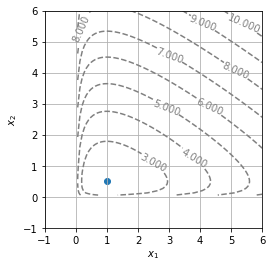

In [6]:
display_contour(
    H, 
    x=np.linspace(-1, 6, 100), 
    y=np.linspace(-1, 6, 100), 
    levels=10, # 10 levels, automatically selected
)

## Question 6


In [7]:

def solve_euler_explicit(f, x0, dt, t0, tf):
    n = int((tf-t0)/dt)
    k = len(x0)
    t = np.array( [t0 + i*dt for i in range(n+1)] )
    x = np.zeros( (k,n+1) )
    x[:,0] = x0
    for i in range(0,n):
        x[:,i+1] = x[:,i] + dt*f(t[i],x[:,i])
    return t, x

In [8]:
def f_OH(t, x):
    return np.array([x[1], -x[0]])

def f_test(t, x):
    return x

def err(X, X_true):
    return max(np.abs(X-X_true))

def f(t, X):
    x1=X[0]
    x2=X[1]
    return np.array([x1*(alpha-beta*x2), -x2*(gamma-delta*x1)])

def H(X):
    x1=X[0]
    x2=X[1]
    return delta*x1-gamma*np.log(x1)+beta*x2-alpha*np.log(x2)

H_ = np.vectorize(H)


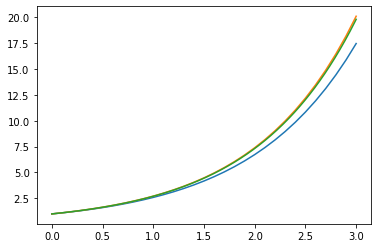

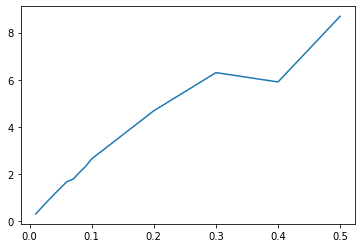

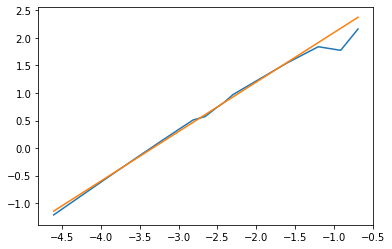

In [19]:
t, x=solve_euler_explicit(f_test, np.array([1]), 0.1, 0, 3)
plt.plot(t, x[0])
plt.plot(t, np.exp(t))
t, x=solve_euler_explicit(f_test, np.array([1]), 0.01, 0, 3)
plt.plot(t, x[0])
plt.show()

dt_s = [0.5, 0.4, 0.3, 0.2, 0.1, 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02, 0.01]
#plt.plot(dt_s, [err(solve_euler_explicit(f_test, np.array([1]), dt, 0, 3)[1][0],np.exp(solve_euler_explicit(f_test, np.array([1]), dt, 0, 3)[0])) for dt in dt_s])

l=[]
for dt in dt_s: 
    t, x=solve_euler_explicit(f_test, np.array([1]), dt, 0, 3)
    l.append(err(x[0], np.exp(t)))
plt.plot(dt_s, l)
plt.axis = 'equal'
plt.show()

plt.plot(np.log(np.array(dt_s)), np.log(np.array(l)))
plt.plot(np.log(np.array(dt_s)), 0.9*np.log(np.array(dt_s))+3)
plt.axis = "equal"
plt.show()

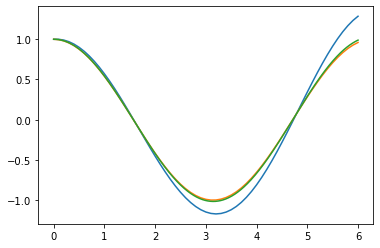

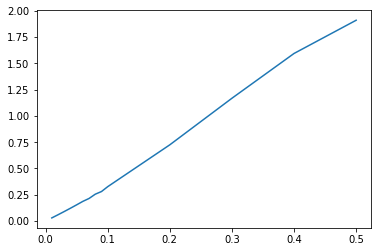

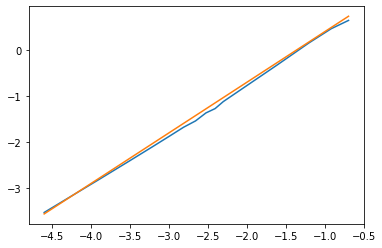

In [21]:
t, x =solve_euler_explicit(f_OH, np.array([1,0]), 0.1, 0, 6)
plt.plot(t, x[0])
plt.plot(t, np.cos(t))
t, x=solve_euler_explicit(f_OH, np.array([1,0]), 0.01, 0, 6)
plt.plot(t, x[0])
plt.show()

dt_s = [0.5, 0.4, 0.3, 0.2, 0.1, 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02, 0.01]
#plt.plot(dt_s, [err(solve_euler_explicit(f_OH, np.array([1,0]), dt, 0, 3)[1][0],np.cos(solve_euler_explicit(f_OH, np.array([1,0]), dt, 0, 3)[0])) for dt in dt_s])

l=[]
for dt in dt_s: 
    t, x=solve_euler_explicit(f_OH, np.array([1,0]), dt, 0, 6)
    l.append(err(x[0], np.cos(t)))
plt.plot(dt_s, l)
plt.axis = 'equal'
plt.show()

plt.plot(np.log(np.array(dt_s)), np.log(np.array(l)))
plt.plot(np.log(np.array(dt_s)), 1.1*np.log(np.array(dt_s))+1.5)
plt.axis = "equal"
plt.show()

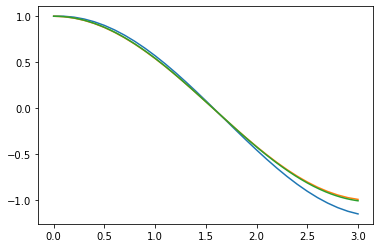

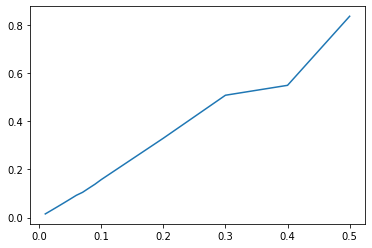

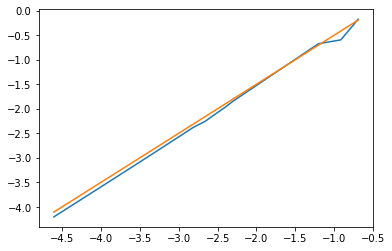

In [15]:
t, x =solve_euler_explicit(f_OH, np.array([1,0]), 0.1, 0, 3)
plt.plot(t, x[0])
plt.plot(t, np.cos(t))
t, x=solve_euler_explicit(f_OH, np.array([1,0]), 0.01, 0, 3)
plt.plot(t, x[0])
plt.show()

dt_s = [0.5, 0.4, 0.3, 0.2, 0.1, 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02, 0.01]
#plt.plot(dt_s, [err(solve_euler_explicit(f_OH, np.array([1,0]), dt, 0, 3)[1][0],np.cos(solve_euler_explicit(f_OH, np.array([1,0]), dt, 0, 3)[0])) for dt in dt_s])

l=[]
for dt in dt_s: 
    t, x=solve_euler_explicit(f_OH, np.array([1,0]), dt, 0, 3)
    l.append(err(x[0], np.cos(t)))
plt.plot(dt_s, l)

plt.show()

plt.plot(np.log(np.array(dt_s)), np.log(np.array(l)))
plt.plot(np.log(np.array(dt_s)), np.log(np.array(dt_s))+0.5)
plt.axis = "equal"
plt.show()

## Question 7


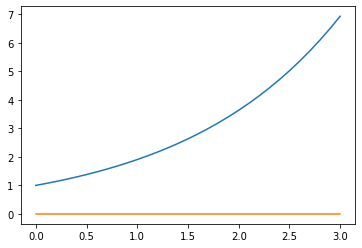

In [18]:
t, x =solve_euler_explicit(f, np.array([1,0]), 0.1, 0, 3)
plt.plot(t, x[0])
plt.plot(t, x[1])
plt.show()

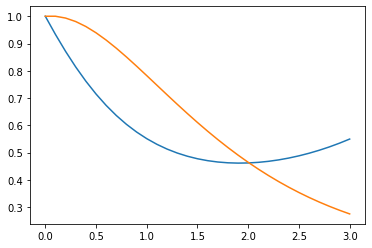

In [19]:
t, x =solve_euler_explicit(f, np.array([1,1]), 0.1, 0, 3)
plt.plot(t, x[0])
plt.plot(t, x[1])
plt.show()

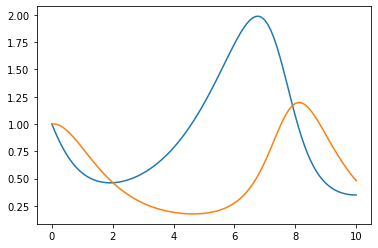

In [20]:
t, x =solve_euler_explicit(f, np.array([1,1]), 0.1, 0, 10)
plt.plot(t, x[0])
plt.plot(t, x[1])
plt.show()

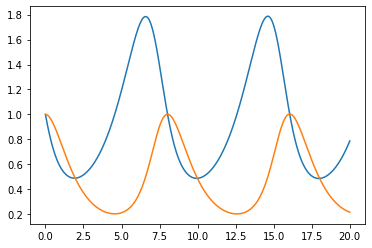

In [30]:
t, x =solve_euler_explicit(f, np.array([1,1]), 0.001, 0, 20)
plt.plot(t, x[0])
plt.plot(t, x[1])
plt.show()

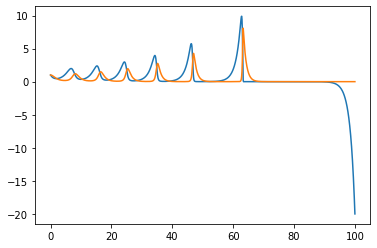

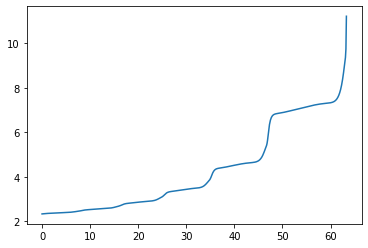

In [41]:
t, x =solve_euler_explicit(f, np.array([1,1]), 0.1, 0, 100)
plt.plot(t, x[0])
plt.plot(t, x[1])
plt.show()
Y = [H(x[:,i]) for i in range(len(t)) ]
plt.plot(t, Y)
plt.show()

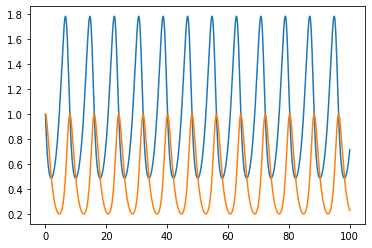

In [43]:
#t, x =solve_euler_explicit(f, np.array([1,1]), 0.00001, 0, 100)
#plt.plot(t, x[0])
#plt.plot(t, x[1])
#plt.show()
#c'est long à executer, o, l'a executé qu'une fois

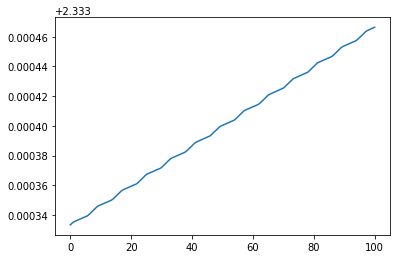

In [44]:
#Y = [H(x[:,i]) for i in range(len(t)) ]
#plt.plot(t, Y)
#plt.show()

## Question 9


Soit $u: \mathbb{R}^{2} \to \mathbb{R}^{2}$ une fonction $C^{1}$.

Soit $x_0 \in \mathbb{R}^{2} $ et $H_0=H(x_0)$.

On note S le système de Lokta-Voltera (d'équation $ \dot X = f(X) $) dont la condition intiale est $x(0) = x_0$ et S' le système modifié d'équation $ \dot X = f(X) + (H(X)-H_0)u(X) $ et de même condition initiale $x_0$.
Par le théorème de Cauchy-Lipschitz, comme $ f$ est $C^1 $, S admet une unique solution $X$.
On vérifie aisement que $X$ est aussi solution de S'(car $H \circ X $ est constante égale à $H_0$). Comme $f$, $u$, et $H$ sont $C^1$ on peut appliquer le théorème de Cauchy-Lipschtiz pour en déduire que $X$ est l'unique solution de S'.
On a bien montré que les solutions de S et de S' étaient identiques et ceci pour $u$ quelconque ($X$ ne dépends pas de $u$).